In [1]:
#%matplotlib notebook
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [2]:
X = np.array([[0, 0], [1,2], [2,4], [3,0], [4,1]])
y = np.array([0, 0.3, 0.75, 1, 2])

In [3]:
def linear_regression_pred(X, y, x):
    X_mat = np.ones(shape = (len(y), len(X[0])+1))
    for i in range(len(X_mat)):
        for j in range(len(X[0])):
            X_mat[i][j+1] = X[i][j] 
    beta = np.dot(np.linalg.inv(X_mat.T@X_mat), np.dot(X_mat.T, y))
    res = []
    for pts in x:
        pred = beta[0]
        for k in range(len(pts)):
            pred+= beta[k+1]*pts[k]
        res.append(pred)
    return np.array(res)

In [4]:
x = np.array([[-1, -1, 5, 5], [-1, 5, -1, 5]]).T
res = linear_regression_pred(X, y, x)

/var/folders/8p/nqs4s0kd4vg6qcsdncs_4t680000gn/T/ipykernel_53264/3937291314.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=45, azim=-120)


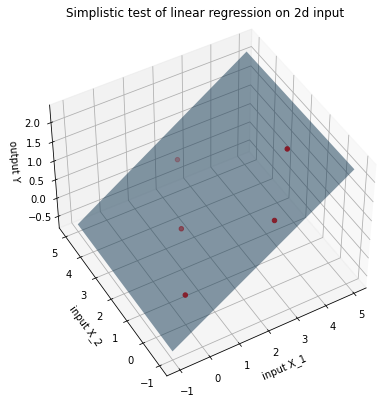

In [5]:
fig = plt.figure(figsize=(6, 5))
ax = Axes3D(fig, elev=45, azim=-120)
ax.scatter(X[:, 0], X[:, 1], y, c='r', marker='o', label='training set')
ax.plot_surface(np.array([[-1, -1], [5, 5]]), np.array([[-1, 5], [-1, 5]]),res.reshape(2,2) , alpha=.5, label='linear regression predictor')
ax.set_xlabel('input X_1')
ax.set_ylabel('input X_2')
ax.set_zlabel('output Y')
plt.title("Simplistic test of linear regression on 2d input")
plt.show()

In [6]:
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')
data = df.to_numpy()


In [7]:
X_train, y_train = data[:,0:8], data[:,8:9]
y_train = np.reshape(y_train, (len(y_train),))
x_test = data[:3, 0:8]
y_pred = linear_regression_pred(X_train, y_train, x_test)
print(y_pred)

[4.51378373e+12 4.51378373e+12 4.51378373e+12]


In [8]:
X = np.array([[0], [1], [2], [3], [4]])
y = np.array([0, 0.3, 0.75, 1, 2])

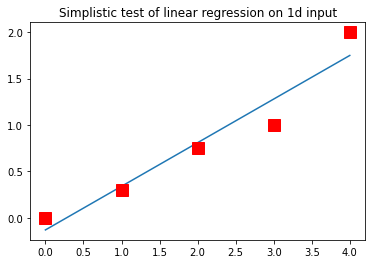

In [9]:
X_eval = np.linspace(0,4,1000)
X_eval = X_eval.reshape(-1,1)

plt.figure()
plt.plot(X_eval,linear_regression_pred(X, y, X_eval), label="linear regression predictor")
plt.plot(X,y, 'rs', markersize=12, label="trainin set")
plt.title("Simplistic test of linear regression on 1d input")
plt.show()

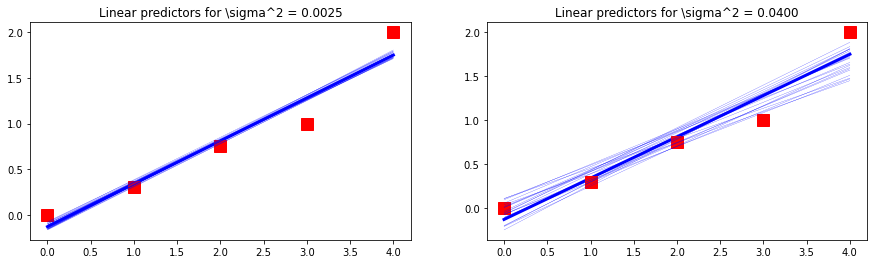

In [10]:
mu = 0
sigma1 = 0.05
sigma2 = 0.2
N = 20
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,4))

ax1.plot(X_eval,linear_regression_pred(X, y, X_eval), 'b-' ,linewidth = 3)
ax1.plot(X,y, 'rs', markersize=12, label="trainin set")
ax2.plot(X_eval,linear_regression_pred(X, y, X_eval), 'b-' ,linewidth = 3)
ax2.plot(X,y, 'rs', markersize=12, label="trainin set")

for i in range (2*N):
    if i % 2 == 0:
        sigma, ax = sigma1, ax1
    else:
        sigma, ax = sigma2, ax2
    noise = np.random.normal(mu, sigma, len(y))
    y_petrb = [y[i]+noise[i] for i in range(len(y))]
    ax.plot(X_eval,linear_regression_pred(X, y_petrb, X_eval),'b-', linewidth = 0.2)
    ax.set_title(f'Linear predictors for \sigma^2 = {sigma**2:.4f}')
plt.show()